Группа: ИУ5-22М

Студентка: Саросек Мария

Вариант: 9

Задача №9.
Для набора данных проведите устранение пропусков для одного (произвольного) числового признака 
с использованием метода заполнения "хвостом распределения".

Задача №29.
Для набора данных проведите удаление константных и псевдоконстантных признаков.

*Для произвольной колонки данных построить гистограмму.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import VarianceThreshold
from IPython.display import Image


%matplotlib inline
sns.set(style="ticks")

In [2]:
def plot_hist_diff(old_ds, new_ds, cols):
    for c in cols:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, density=True, color='blue', alpha=0.5)
        plt.show

def impute_column(dataset, column, strategy_param, fill_value_param=None):
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data


def research_impute_numeric_column(dataset, num_column, const_value=None):
    strategy_params = ['mean', 'median', 'most_frequent', 'constant']
    strategy_params_names = ['Среднее', 'Медиана', 'Мода']
    strategy_params_names.append('Константа = ' + str(const_value))
    
    original_temp_data = dataset[[num_column]].values
    size = original_temp_data.shape[0]
    original_data = original_temp_data.reshape((size,))
    
    new_df = pd.DataFrame({'Исходные данные':original_data})
    
    for i in range(len(strategy_params)):
        strategy = strategy_params[i]
        col_name = strategy_params_names[i]
        if (strategy!='constant') or (strategy == 'constant' and const_value!=None):
            if strategy == 'constant':
                temp_data, _, _ = impute_column(dataset, num_column, strategy, fill_value_param=const_value)
            else:
                temp_data, _, _ = impute_column(dataset, num_column, strategy)
            new_df[col_name] = temp_data
            
    sns.kdeplot(data=new_df)        

# Задача №9 - Устранение пропусков для числового признака методом заполнения "хвостом распределения"

In [3]:
#data_loaded = pd.read_csv('netflix_titles.csv', sep=",")
data_loaded = pd.read_csv('opsd_germany_daily.csv', sep=",")

In [4]:
data_loaded.shape

(4383, 5)

In [5]:
data_loaded

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [6]:
data_features = list(zip(
[i for i in data_loaded.columns],
zip(
    #типы колонок
    [str(i) for i in data_loaded.dtypes],
    #проверка, есть ли пропущенные значения
    [i for i in data_loaded.isnull().sum()]
)))
data_features

[('Date', ('object', 0)),
 ('Consumption', ('float64', 0)),
 ('Wind', ('float64', 1463)),
 ('Solar', ('float64', 2195)),
 ('Wind+Solar', ('float64', 2196))]

In [7]:
data_loaded['Wind'].mean()

164.8141726027395

In [8]:
data_loaded['Wind'].std()

143.69273168412707

In [9]:
# ev - extreme value
Wind_ev = data_loaded['Wind'].mean() + 3*data_loaded['Wind'].std()
Wind_ev

595.8923676551207

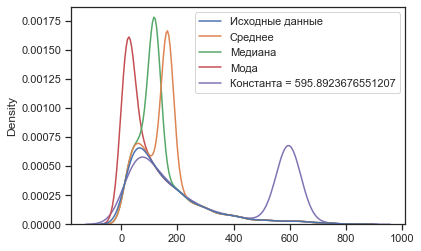

In [10]:
research_impute_numeric_column(data_loaded, 'Wind', Wind_ev)

In [11]:
data_loaded['Solar'].mean()

89.25869469835473

In [12]:
data_loaded['Solar'].std()

58.55009947005548

In [13]:
Solar_ev = data_loaded['Solar'].mean() + 3*data_loaded['Solar'].std()
Solar_ev

264.90899310852114

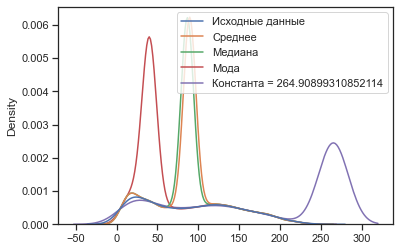

In [14]:
research_impute_numeric_column(data_loaded, 'Solar', Solar_ev)

<function matplotlib.pyplot.show(close=None, block=None)>

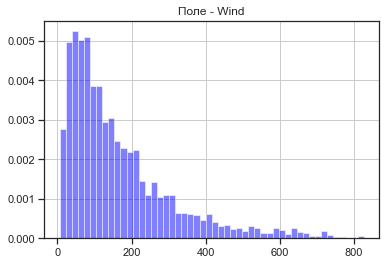

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.title.set_text('Поле - ' + str('Wind'))
data_loaded['Wind'].hist(bins=50, ax=ax, density=True, color='blue', alpha=0.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

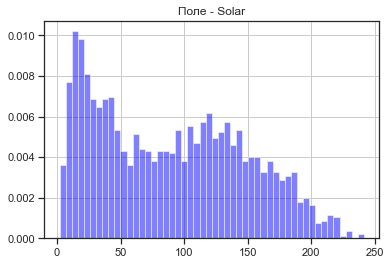

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.title.set_text('Поле - ' + str('Solar'))
data_loaded['Solar'].hist(bins=50, ax=ax, density=True, color='blue', alpha=0.5)
plt.show

# Задача №29 - Удаление константных и псевдоконстантных признаков

In [17]:
data_loaded['ConstantFeature'] = 1
data_loaded['PseudoConstantFeature'] = 1
data_loaded['PseudoConstantFeature'][0] = 2
data_loaded

<ipython-input-17-3e486f839d36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loaded['PseudoConstantFeature'][0] = 2


,Date,Consumption,Wind,Solar,Wind+Solar,ConstantFeature,PseudoConstantFeature
0,2006-01-01,1069.18400,NaN,NaN,NaN,1,2
1,2006-01-02,1380.52100,NaN,NaN,NaN,1,1
2,2006-01-03,1442.53300,NaN,NaN,NaN,1,1
3,2006-01-04,1457.21700,NaN,NaN,NaN,1,1
4,2006-01-05,1477.13100,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,1,1
4379,2017-12-28,1299.86398,506.424,14.162,520.586,1,1
4380,2017-12-29,1295.08753,584.277,29.854,614.131,1,1
4381,2017-12-30,1215.44897,721.247,7.467,728.714,1,1


In [18]:
data_loaded['ConstantFeature'].unique()

array([1], dtype=int64)

In [19]:
data_loaded['PseudoConstantFeature'].unique()

array([2, 1], dtype=int64)

In [20]:
# Используем только некоторые признаки
cols_filter = ['Wind', 'Solar', 'ConstantFeature', 'PseudoConstantFeature']
data = data_loaded[cols_filter]
data.tail()

,Wind,Solar,ConstantFeature,PseudoConstantFeature
4378,394.507,16.530,1,1
4379,506.424,14.162,1,1
4380,584.277,29.854,1,1
4381,721.247,7.467,1,1
4382,721.176,19.980,1,1


In [21]:
selector = VarianceThreshold(threshold=0.15)
selector.fit(data)
selector.variances_

array([2.06405300e+04, 3.42654737e+03, 0.00000000e+00, 2.28102178e-04])

In [22]:
# Константный и псевдоконстантный признаки удалены
selector.transform(data)

array([[    nan,     nan],
       [    nan,     nan],
       [    nan,     nan],
       ...,
       [584.277,  29.854],
       [721.247,   7.467],
       [721.176,  19.98 ]])